In [188]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

## The Training, Validation, Test Split

In [189]:
diamond_data = pd.read_csv("diamond_data.csv")
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.00,Ideal,E,I1,61.8,56.0,3520,6.38,6.43,3.96
1,2.18,Ideal,I,SI2,62.5,55.0,15706,8.31,8.34,5.20
2,0.53,Ideal,H,SI1,62.2,54.0,1205,5.18,5.23,3.24
3,0.30,Ideal,G,VS1,61.5,57.0,605,4.31,4.34,2.66
4,0.76,Premium,E,SI1,58.3,62.0,2937,6.12,5.95,3.52


In [190]:
len(diamond_data)

2000

In [191]:
from sklearn.utils import shuffle
np.random.seed(31415)
diamond_data = shuffle(diamond_data)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
305,0.59,Ideal,E,VVS1,62.0,56.0,2829,5.36,5.38,3.33
1051,1.23,Ideal,H,SI2,60.6,57.0,5951,6.98,6.94,4.22
790,1.00,Good,E,SI1,59.8,65.0,4213,6.56,6.45,3.89
1385,0.58,Ideal,F,VVS1,61.6,57.0,2728,5.33,5.38,3.30
32,1.00,Premium,F,VS1,59.2,60.0,7056,6.53,6.48,3.58


In [192]:
#split our 2000 rows into 1500 for training, 300 for validation, 200 for test
diamond_training_data, diamond_validation_data, diamond_test_data = np.split(diamond_data, [1500, 1800])

In [193]:
len(diamond_training_data)

1500

In [194]:
len(diamond_validation_data)

300

In [195]:
len(diamond_test_data)

200

In [196]:
numeric_diamond_training_data = diamond_training_data[["carat", "depth", "table", "x", "y", "z"]]
numeric_diamond_validation_data = diamond_validation_data[["carat", "depth", "table", "x", "y", "z"]]
numeric_diamond_test_data = diamond_test_data[["carat", "depth", "table", "x", "y", "z"]]

In [197]:
def get_training_and_validation_mse(degree):
    diamond_poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('model', LinearRegression(fit_intercept=False))
    ])
    
    diamond_poly_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])    
    
    training_error = mean_squared_error(diamond_poly_model.predict(numeric_diamond_training_data), diamond_training_data[["price"]])
    validation_error = mean_squared_error(diamond_poly_model.predict(numeric_diamond_validation_data), diamond_validation_data[["price"]])
    return training_error, validation_error

Text(0, 0.5, 'MSE')

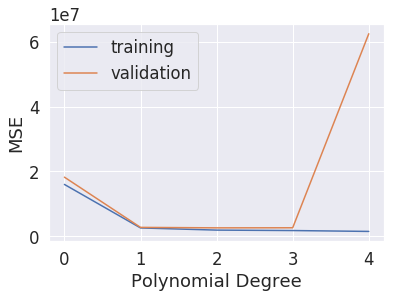

In [198]:
mses = np.array([get_training_and_validation_mse(i) for i in range(5)])
plt.plot(mses[:, 0])
plt.plot(mses[:, 1])
plt.legend(["training", "validation"])
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')

Since degree 2 minimizes the validation error, let's use that.

In [199]:
diamond_poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression(fit_intercept=False))
])
diamond_poly_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False))])

In [200]:
diamond_poly_model.named_steps["model"].coef_

array([[ 2.29766455e+06,  3.35320272e+05, -6.62243156e+04,
        -6.82227646e+03,  6.08277962e+03, -5.94485402e+05,
         8.47670814e+05, -2.05236443e+04, -6.99580511e+03,
         6.55499307e+02, -4.45258200e+04,  1.03428008e+04,
         8.24633682e+04,  4.39339352e+02,  1.41588443e+02,
        -1.13506746e+03,  9.67521617e+03, -1.12268561e+04,
        -7.43790781e+00,  7.86308380e+02,  4.87110546e+02,
        -2.51975928e+03, -2.61284705e+04,  2.72537740e+04,
         5.53925598e+04,  2.91780854e+04, -1.48611781e+05,
         6.46259519e+04]])

In [201]:
mean_squared_error(diamond_poly_model.predict(numeric_diamond_training_data), diamond_training_data[["price"]])

1943708.2353207907

In [202]:
mean_squared_error(diamond_poly_model.predict(numeric_diamond_test_data), diamond_test_data[["price"]])

2628700.273572883

## Regularization

In [203]:
diamond_linear_model = linear_model.LinearRegression()
diamond_linear_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [204]:
diamond_linear_model.coef_

array([[  9653.44335538,    673.21040001,    -49.59434766,
         -1509.97271414,   9535.89018689, -14263.30237321]])

In [205]:
diamond_linear_ridge_model = linear_model.Ridge(alpha=100)
diamond_linear_ridge_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [206]:
diamond_linear_ridge_model.coef_

array([[1538.21623224,  -66.53501142,  -60.12187676,  971.65087145,
        1164.96768562,  634.13061712]])

In [207]:
mean_squared_error(diamond_linear_model.predict(numeric_diamond_training_data), diamond_training_data[["price"]])

2613827.2912406116

In [208]:
mean_squared_error(diamond_linear_ridge_model.predict(numeric_diamond_training_data), diamond_training_data[["price"]])

3302279.7114102263

In [209]:
ss = StandardScaler()
ss.fit(numeric_diamond_training_data)
scaled_numeric_diamond_training_data = ss.transform(numeric_diamond_training_data)
scaled_diamond_linear_ridge_model = linear_model.Ridge(alpha=100)
scaled_diamond_linear_ridge_model.fit(scaled_numeric_diamond_training_data, diamond_training_data[["price"]])

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [210]:
scaled_diamond_linear_ridge_model.coef_

array([[2002.28388458, -167.16663868, -128.86708803,  452.59707128,
         640.49293435,  469.80118953]])

In [211]:
scaled_diamond_linear_ridge_model_pipeline = Pipeline([
        ('scale', StandardScaler()),
        ('model', linear_model.Ridge(alpha=100))
    ])

scaled_diamond_linear_ridge_model_pipeline.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [212]:
scaled_diamond_linear_ridge_model_pipeline.named_steps["model"].coef_

array([[2002.28388458, -167.16663868, -128.86708803,  452.59707128,
         640.49293435,  469.80118953]])

In [213]:
mean_squared_error(scaled_diamond_linear_ridge_model_pipeline.predict(numeric_diamond_training_data), diamond_training_data[["price"]])

2975938.762509778

In [214]:
mean_squared_error(diamond_linear_model.predict(numeric_diamond_training_data), diamond_training_data[["price"]])

2613827.2912406116

Where things get interesting is when we look at how test and validation error vary as a function of alpha. First let's consider a linear regression model that uses features up to polynomial degree 4.

In [215]:
#uses scaling to avoid numerical error
degree_4_linear_regression_model = Pipeline([        
    ('scale', StandardScaler()),        
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.LinearRegression(fit_intercept=False))
])   

degree_4_linear_regression_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])
mean_squared_error(degree_4_linear_regression_model.predict(numeric_diamond_validation_data), diamond_validation_data[["price"]])

73971430.55503131

In [216]:
degree_4_ridge_regression_model = Pipeline([        
    ('scale', StandardScaler()),    
    ('poly', PolynomialFeatures(degree = 4)),
    ('model', linear_model.Ridge(alpha = 0, fit_intercept=False))
])   

degree_4_ridge_regression_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])
mean_squared_error(degree_4_ridge_regression_model.predict(numeric_diamond_validation_data), diamond_validation_data[["price"]])

/home/hug/miniconda2/envs/data100/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.24477e-19): result may not be accurate.
  overwrite_a=True).T


77254300.1957586

In [217]:
def get_diamond_ridge_training_and_validation_mse_error(alpha):
    model = Pipeline([
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(degree=4)),
        ('model', linear_model.Ridge(alpha=alpha, fit_intercept=False))
    ])    
    
    model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])
    
    training_mse = mean_squared_error(model.predict(numeric_diamond_training_data), diamond_training_data['price'])
    validation_mse = mean_squared_error(model.predict(numeric_diamond_validation_data), diamond_validation_data['price'])

    return training_mse, validation_mse

Text(0, 0.5, 'MSE')

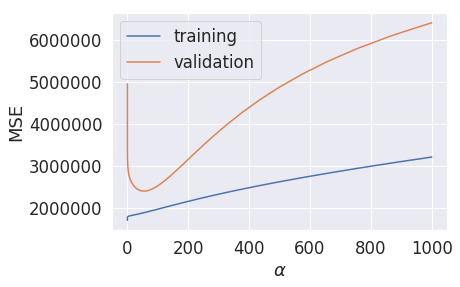

In [218]:
alphas = 10**np.linspace(-3, 3, 100) #between 10^-3 and 10^3
mses = np.array([get_diamond_ridge_training_and_validation_mse_error(alpha) for alpha in alphas])
plt.plot(alphas, mses[:, 0])
plt.plot(alphas, mses[:, 1])
plt.legend(["training", "validation"])
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')

In [219]:
get_diamond_ridge_training_and_validation_mse_error(10**-1)

(1764477.5366211906, 3289825.0053150794)

Text(0, 0.5, 'MSE')

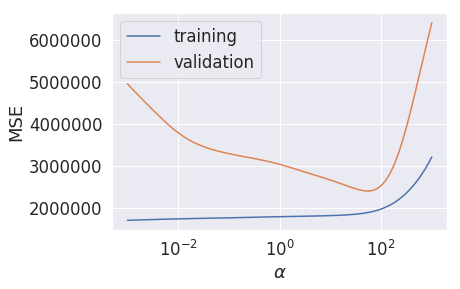

In [220]:
alphas = 10**np.linspace(-3, 3, 100)
mses = np.array([get_diamond_ridge_training_and_validation_mse_error(alpha) for alpha in alphas])
plt.semilogx(alphas, mses[:, 0])
plt.semilogx(alphas, mses[:, 1])
plt.legend(["training", "validation"])
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

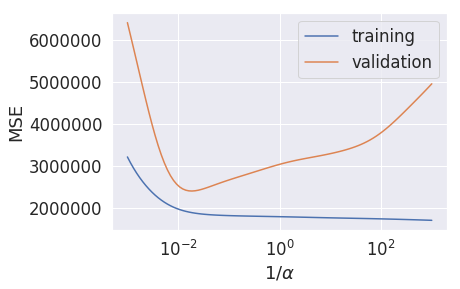

In [221]:
alphas = 10**np.linspace(3, -3, 100)
mses = np.array([get_diamond_ridge_training_and_validation_mse_error(alpha) for alpha in alphas])
plt.semilogx(1/alphas, mses[:, 0])
plt.semilogx(1/alphas, mses[:, 1])
plt.legend(["training", "validation"])
plt.xlabel(r'$1/\alpha$')
plt.ylabel('MSE')

In [222]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.Ridge(alpha=80, fit_intercept=False))
])    
model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('model', Ridge(alpha=80, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [223]:
model.named_steps['model'].coef_

array([[ 2.36469810e+03,  3.76581618e+02, -3.93184606e+01,
        -8.34490681e+01,  7.80066072e+02,  8.73613642e+02,
         8.07287029e+02,  1.87340493e+01, -2.25599036e+01,
         1.87428381e+01,  7.67516514e+01,  1.24308490e+02,
         9.77483311e+01,  8.60740849e+01,  9.38257553e+01,
        -3.11674130e+01, -1.38036048e+01,  9.23653647e+00,
         2.07485875e+02, -1.81756617e+01, -1.93084998e+01,
        -2.29393305e+01,  2.08432969e+02,  2.63271571e+02,
         2.27595848e+02,  3.23217003e+02,  2.86271109e+02,
         2.60748458e+02, -7.18023990e+01, -2.16381687e+01,
        -7.68920784e+00, -6.71191680e+01, -2.25764668e+01,
        -3.44936522e+01,  3.85224542e+01, -5.94485977e+01,
        -1.87907586e+00, -3.47048538e+01,  1.96110607e+00,
         1.47211387e+01, -6.71541534e+00,  8.13400137e-01,
        -1.86536167e+01, -6.30616658e+01, -1.01521694e+01,
        -2.79207332e+01,  4.59086387e+01,  2.11562133e+01,
         9.00846746e+00,  1.14808923e+00,  4.98228870e+0

In [224]:
mean_squared_error(model.predict(numeric_diamond_validation_data), diamond_validation_data[["price"]])

2447469.810322093

In [225]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', linear_model.Ridge(alpha=80, fit_intercept=False))
])    
model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('model', Ridge(alpha=80, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [226]:
model.named_steps['model'].coef_

array([[ 2.50017721e+03,  4.26877667e+02,  1.58464984e+01,
        -8.28079580e+01,  8.51393899e+02,  9.39829492e+02,
         8.80982073e+02,  1.79479078e+01, -6.43642391e+01,
         3.89343478e+00,  7.75421889e+00,  1.63098047e+02,
         8.20393744e+01, -1.77261417e+01,  5.09784380e+01,
        -2.55672908e+01, -2.72254599e+01, -9.52870918e-01,
         7.94644798e+01, -5.37329358e+01, -4.81209296e+01,
        -6.58805120e+01,  7.57094958e+01,  2.26822787e+02,
         1.44950836e+02,  3.83210152e+02,  2.97017318e+02,
         2.25878798e+02,  8.31657366e+01,  2.81502611e+02,
         1.89244245e+02, -3.13253964e+02, -6.16633513e+01,
        -4.33783182e+01, -1.56851785e+02, -1.87429318e+02,
         4.17361649e+00, -2.18812557e+01,  1.29338816e+00,
        -1.20715567e+02,  8.78890956e+01,  9.93524724e+01,
         1.37287901e+01, -3.36312490e+02, -1.28395840e+02,
        -1.80431847e+02,  7.87695974e+01,  2.20906488e+01,
        -1.80372957e+01,  7.52274204e+00,  3.15125714e+0

In [227]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', linear_model.Lasso(alpha=80, fit_intercept=False))
])    
model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('model', Lasso(alpha=80, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [228]:
model.named_steps['model'].coef_

array([2827.94850771,    0.        ,    0.        ,   -0.        ,
          0.        , 2602.64945042,  471.03559313,    0.        ,
          0.        ,   -0.        ,    0.        ,    0.        ,
          0.        ,  -40.82715454,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,   -0.        ,
         -0.        ,   -0.        ,    0.        ,    0.        ,
          0.        , 1279.94096822,    0.        ,    0.        ,
       -164.44344008,  104.65103891,   56.02802995,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,   -0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   -8.80341513,   -0.        ,   -0.        ,
         -0.        ,  -25.27143356,    0.        ,   -0.        ,
         -0.        ,   -0.        ,    0.        ,    0.     

In [229]:
ridge_alpha_80 = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.Ridge(alpha=80, fit_intercept=False))
])    
ridge_alpha_80.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('model', Ridge(alpha=80, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

## Cross Validation Demo

With the linear_model.Ridge model, we had to pick a particular alpha.

In [230]:
ridge_model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.Ridge(alpha=0.1, fit_intercept=False))
])    
ridge_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('model', Ridge(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

With the linear_model.RidgeCV model, we give a list of alphas and it will automatically find the best one. 
This is done without use of a pre-determined validation set!

In [231]:
cv_model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], fit_intercept=False))
])    
cv_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('model', RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=None, fit_intercept=False,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False))])

In [232]:
cv_model.named_steps['model'].alpha_

100.0

In [233]:
cv_model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.RidgeCV(alphas=10**np.linspace(3, -3, 100), fit_intercept=False))
])    
cv_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('model', RidgeCV(alphas=array([1.00000e+03, 8.69749e+02, ..., 1.14976e-03, 1.00000e-03]),
    cv=None, fit_intercept=False, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False))])

In [234]:
cv_model.named_steps['model'].alpha_

187.3817422860383

Earlier, from our graph, we saw that an alpha of around 80 minimized the error on a special validation set.

In [235]:
mean_squared_error(ridge_alpha_80.predict(numeric_diamond_validation_data), diamond_validation_data[["price"]])

2447469.810322093

Interestingly, even though our cv_model never even got to see the numeric_diamond_validation_data, the alpha it picks is still pretty good on this unseen data.

In [236]:
mean_squared_error(cv_model.predict(numeric_diamond_validation_data), diamond_validation_data[["price"]])

3072021.442605327